# TASK 3 - CREDIT CARD FRAUD DETECTION

### Problem Statement :-
* Build a machine learning model to identify fraudulent credit card transactions.

* Preprocess and normalize the transaction data, handle class imbalance issues, and split the dataset into training and testing sets.

* Train a classification algorithm, such as logistic regression or random forests, to classify transactions as fraudulent or genu

* Data source :- https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
  ine.

#### Data Exploration and Understanding

In [1]:
# Importing libraries

## Data manipulation
import pandas as pd 

## Arrays 
import numpy as np 

## Viusalization 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
## Loading the dataset 
creditcard_dataset = pd.read_csv(r"C:\Users\Amit\Desktop\Dataset\creditcard.csv")
print("__"*30)
print("Printing first 5 data from dataset \n")
print(creditcard_dataset.head(5))
print("__"*30)

____________________________________________________________
Printing first 5 data from dataset 

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.

In [3]:
creditcard_dataset.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
269287,163615.0,1.990443,-0.185422,-0.264961,0.325631,-0.594303,-0.736241,-0.390093,-0.135478,1.174951,...,-0.101491,-0.096351,0.348730,-0.045657,-0.349008,-0.924274,0.069024,-0.025368,1.00,0
158383,111147.0,2.096132,0.090214,-1.424292,0.309421,0.471261,-0.619225,0.071793,-0.347517,2.010524,...,0.104167,0.718304,-0.007259,0.384620,0.362873,-0.470689,-0.018408,-0.056176,1.00,0
268532,163263.0,2.038208,-0.080432,-1.072159,0.427336,-0.149996,-1.211951,0.208942,-0.345340,0.521947,...,-0.279960,-0.694399,0.329179,0.050107,-0.300132,0.193694,-0.072268,-0.057474,13.99,0
6476,7750.0,-1.594998,-0.420661,2.811693,0.596092,-0.106658,0.626458,0.748123,0.063950,1.036263,...,0.260118,0.682163,0.281611,0.154949,0.480967,-0.403889,-0.193309,-0.134102,250.00,0
209073,137400.0,-14.114113,-19.285840,-0.834272,2.767846,8.528499,-7.183542,-5.447473,1.241440,-0.534334,...,1.789776,-2.377339,1.673384,0.679269,0.609303,-0.758492,-0.103676,-2.519710,842.47,0
55345,46895.0,1.204428,-1.424090,0.301022,-1.392610,-1.419927,-0.184976,-0.933189,0.005298,-2.123086,...,-0.063346,-0.059946,-0.052710,0.013629,0.241482,-0.207030,0.020150,0.028141,132.33,0
261271,159940.0,-0.064668,-0.176510,1.440027,-2.620389,-0.566435,-0.025331,-0.268290,0.006235,2.062830,...,0.329650,1.221201,-0.179345,-0.431046,-0.639873,-0.297367,-0.293420,-0.169291,8.49,0
265905,162100.0,1.323630,-0.538295,-0.990265,4.295730,0.073714,0.177992,0.608638,-0.194953,-0.531637,...,0.239603,0.322695,-0.284106,-0.065387,0.227489,0.163516,-0.082884,-0.004194,313.29,0
131763,79728.0,-0.819917,1.391771,1.745581,1.691136,0.762112,0.035231,0.868806,0.084271,-0.960138,...,-0.112310,-0.218423,-0.460729,-0.196861,0.709710,0.033438,0.039461,0.083721,10.58,0
9498,14107.0,-1.472351,3.616237,-2.654135,1.317995,0.631436,-1.952511,0.891462,-0.317846,2.799747,...,-0.670777,-0.414534,0.151437,-0.043914,-0.056894,-0.510692,0.268878,-0.462780,0.89,0


In [4]:
# Exploraing the structure , datatypes and missing values of the dataset.
## Shape of the dataset
print("--"*30)
print(f"Shape of the dataset is : \n{creditcard_dataset.shape}")
print("--"*30)

## Datatypes of the dataset
print("--"*30)
print("Datatypes : \n")
print(creditcard_dataset.dtypes)
print("--"*30)

## Information of the dataset
print("--"*30)
print("Information of the dataset")
print(creditcard_dataset.info())
print("--"*30)



------------------------------------------------------------
Shape of the dataset is : 
(284807, 31)
------------------------------------------------------------
------------------------------------------------------------
Datatypes : 

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
------------------------------------------------------------
------------------------------------------------------------
Information of the dataset
<class 'pandas.core.frame.DataFrame'>
Rang

###### Overview :-
* The dataset contains 284,807 transactions, of which 492 (0.17%) are fraudulent.
* Each transaction has 31 features, all of which are numerical.
* The features V1, V2, ..., V28 are the result of a PCA transformation.
* The Time feature contains the time elapsed since the first transaction, and the Amount feature contains the transaction amount.
* The response variable, Class, is 1 in the case of fraud, and 0 otherwise.

#### Data preprocessing

In [5]:
## Missing values 
print("--"*30)
print("Missing Values")
print(creditcard_dataset.isna().sum())
print("--"*30)


------------------------------------------------------------
Missing Values
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
------------------------------------------------------------


In [6]:
## Checking the duplicated values
print("--"*30)
print("Duplicated values")
print(creditcard_dataset.duplicated().value_counts())
print("--"*30)

duplicated_values = creditcard_dataset.duplicated().value_counts()
print(f"There are {duplicated_values.iloc[1]} duplicated values present in the dataset")
print("--"*30)

## Checking the indices which has the duplicated values
print("--"*30)
duplicated_indices = creditcard_dataset[creditcard_dataset.duplicated()].index
print(f"These are the indices {duplicated_indices} that has the duplicated values")

## data of duplicated dataset
print("--"*30)
duplicated_data = creditcard_dataset[creditcard_dataset.duplicated().values]
print("Duplicated data from the dataset")
print(duplicated_data)
print("--"*30)


------------------------------------------------------------
Duplicated values
False    283726
True       1081
Name: count, dtype: int64
------------------------------------------------------------
There are 1081 duplicated values present in the dataset
------------------------------------------------------------
------------------------------------------------------------
These are the indices Index([    33,     35,    113,    114,    115,    221,    223,   1178,   1180,
         1382,
       ...
       282210, 282211, 282212, 282213, 282985, 282987, 283483, 283485, 284191,
       284193],
      dtype='int64', length=1081) that has the duplicated values
------------------------------------------------------------
Duplicated data from the dataset
            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113

In [7]:
# Removing the duplicated values 
print("--"*30)
creditcard_dataset.drop_duplicates(inplace=True)
print("Removed the duplicated values")
print("--"*30)

------------------------------------------------------------
Removed the duplicated values
------------------------------------------------------------


In [8]:
# Checking the duplicated values
print("--"*30)
print("Duplicated values")
print(creditcard_dataset.duplicated().value_counts())
print("--"*30)

------------------------------------------------------------
Duplicated values
False    283726
Name: count, dtype: int64
------------------------------------------------------------


In [9]:
# Description of the dataset 
## Stats 
print("--"*30)
print(creditcard_dataset.describe().T)
print("--"*30)

------------------------------------------------------------
           count          mean           std         min           25%  \
Time    283726.0  94811.077600  47481.047891    0.000000  54204.750000   
V1      283726.0      0.005917      1.948026  -56.407510     -0.915951   
V2      283726.0     -0.004135      1.646703  -72.715728     -0.600321   
V3      283726.0      0.001613      1.508682  -48.325589     -0.889682   
V4      283726.0     -0.002966      1.414184   -5.683171     -0.850134   
V5      283726.0      0.001828      1.377008 -113.743307     -0.689830   
V6      283726.0     -0.001139      1.331931  -26.160506     -0.769031   
V7      283726.0      0.001801      1.227664  -43.557242     -0.552509   
V8      283726.0     -0.000854      1.179054  -73.216718     -0.208828   
V9      283726.0     -0.001596      1.095492  -13.434066     -0.644221   
V10     283726.0     -0.001441      1.076407  -24.588262     -0.535578   
V11     283726.0      0.000202      1.018720   -4.7

C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


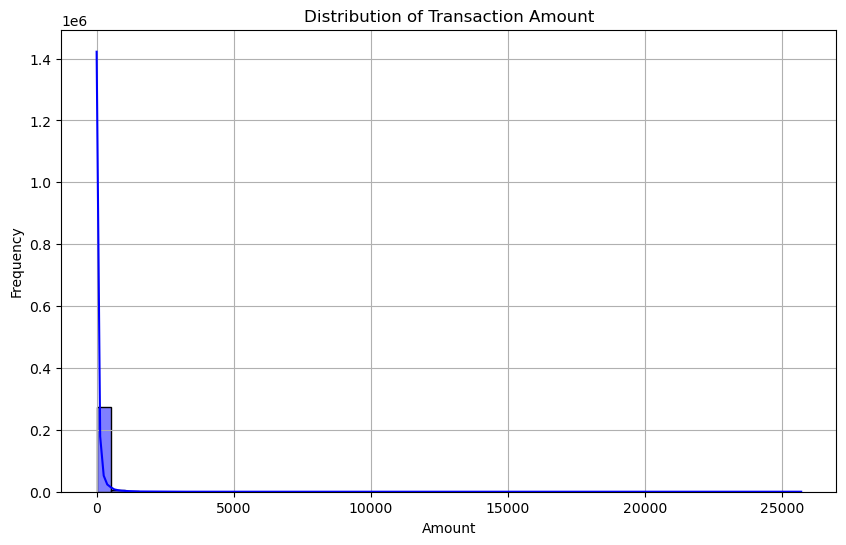

In [10]:
# Plot distribution of 'Amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(creditcard_dataset['Amount'], bins=50, kde=True, color='blue')
plt.grid(True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


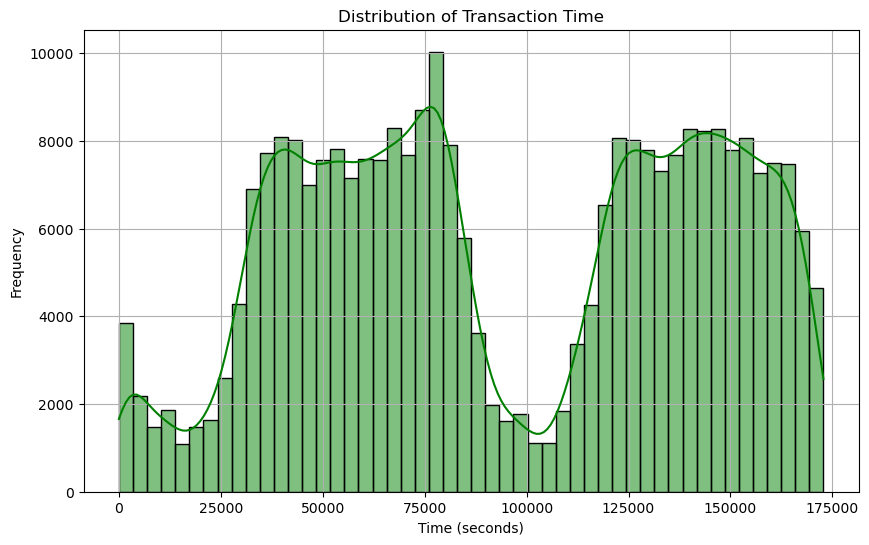

In [11]:
# Plot distribution of 'Time' feature
plt.figure(figsize=(10, 6))
sns.histplot(creditcard_dataset['Time'], bins=50, kde=True, color='green')
plt.grid(True)
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

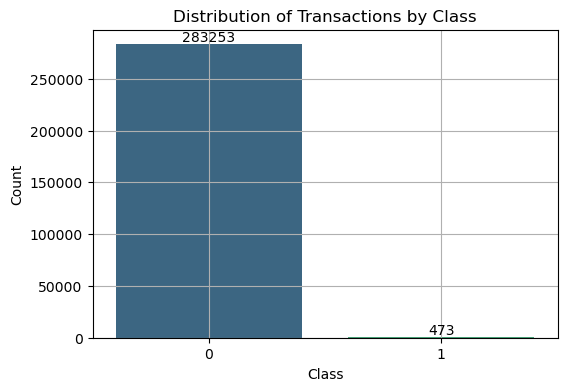

0: 'Genuine', 1: 'Fraudulent'


In [12]:
# Plot distribution of the target variable 'Class'
# Define class labels dictionary
# class_labels = {0: 'Genuine', 1: 'Fraudulent'}

# Map class labels to descriptive names
# creditcard_dataset['Class'] = creditcard_dataset['Class'].map(class_labels)

# Plot distribution of the target variable 'Class' with labels
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=creditcard_dataset, palette='viridis')
plt.grid(True)
plt.title('Distribution of Transactions by Class')
plt.xlabel('Class')
plt.ylabel('Count')
# Add text labels on the bars
for index, value in enumerate(creditcard_dataset['Class'].value_counts()):
    plt.text(index, value + 10, str(value), ha='center', va='bottom')
plt.show()

print("0: 'Genuine', 1: 'Fraudulent'")



------------------------------------------------------------
Class
0    283253
1       473
Name: count, dtype: int64


0: 'Genuine', 1: 'Fraudulent'


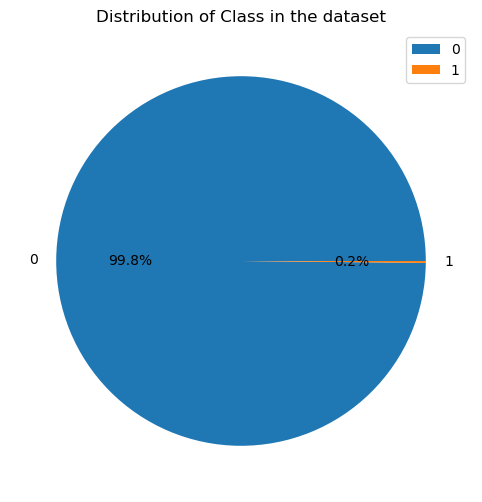

In [13]:
# Visualization 
plt.figure(figsize=(8,6))
count_class = creditcard_dataset['Class'].value_counts()
print("--"*30)
print(count_class)
print("\n")
print("0: 'Genuine', 1: 'Fraudulent'")

plt.pie(count_class , labels=count_class.index , autopct='%1.1f%%')
plt.legend()
plt.title("Distribution of Class in the dataset")
plt.show()


            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.117927 -0.010556 -0.422054 -0.105845  0.173223 -0.063279   
V1      0.117927  1.000000  0.006875 -0.008112  0.002257 -0.007036  0.000413   
V2     -0.010556  0.006875  1.000000  0.005278 -0.001495  0.005210 -0.000594   
V3     -0.422054 -0.008112  0.005278  1.000000  0.002829 -0.006879 -0.001511   
V4     -0.105845  0.002257 -0.001495  0.002829  1.000000  0.001744 -0.000880   
V5      0.173223 -0.007036  0.005210 -0.006879  0.001744  1.000000 -0.000938   
V6     -0.063279  0.000413 -0.000594 -0.001511 -0.000880 -0.000938  1.000000   
V7      0.085335 -0.009173  0.007425 -0.011721  0.004657 -0.008709  0.000436   
V8     -0.038203 -0.001168  0.002899 -0.001815  0.000890  0.001430  0.003036   
V9     -0.007861  0.001828 -0.000274 -0.003579  0.002154 -0.001213 -0.000734   
V10     0.031068  0.000815  0.000620 -0.009632  0.002753 -0.006050 -0.002180   
V11    -0.248536  0.001028 -0.000633  0.

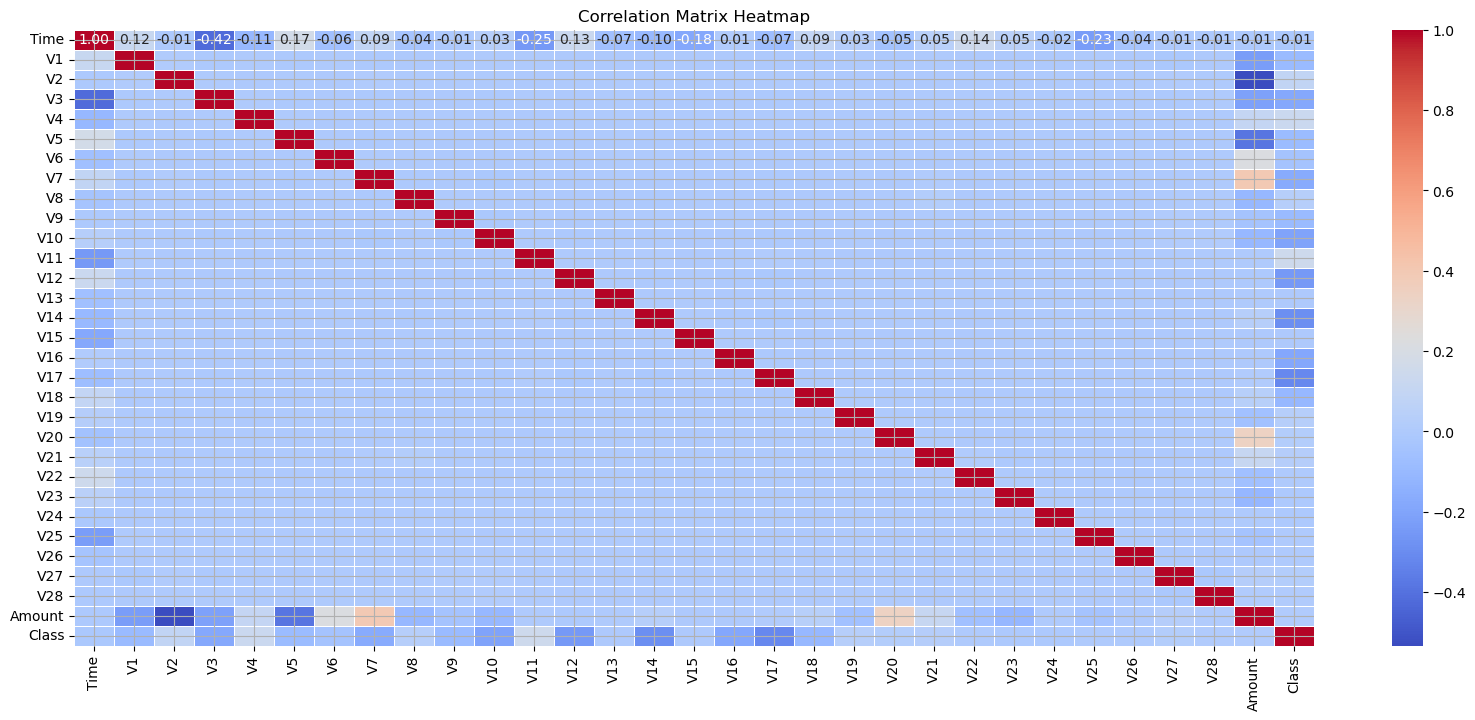

In [14]:
# Plot correlation matrix heatmap
plt.figure(figsize=(20, 8))
corr = creditcard_dataset.corr()
print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.grid(True)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### Exploratory data analysis

In [15]:
# Checking the data of Amount column
print("--"*30)
print("Checking the data of Amount column")
print(creditcard_dataset.Amount.value_counts())
print("--"*30)
print("Stats of Amount column\n" ,creditcard_dataset.Amount.describe())

------------------------------------------------------------
Checking the data of Amount column
Amount
1.00      13566
1.98       6044
0.89       4871
9.99       4738
15.00      3280
          ...  
526.60        1
248.16        1
492.65        1
811.50        1
95.63         1
Name: count, Length: 32767, dtype: int64
------------------------------------------------------------
Stats of Amount column
 count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64


These statistics show that the Amount column has a wide range of values, with a right-skewed distribution, as indicated by the difference between the mean and median. The minimum value is 0, and the maximum value is $25,691.16 with a large standard deviation $250.40, indicating variability in the data.

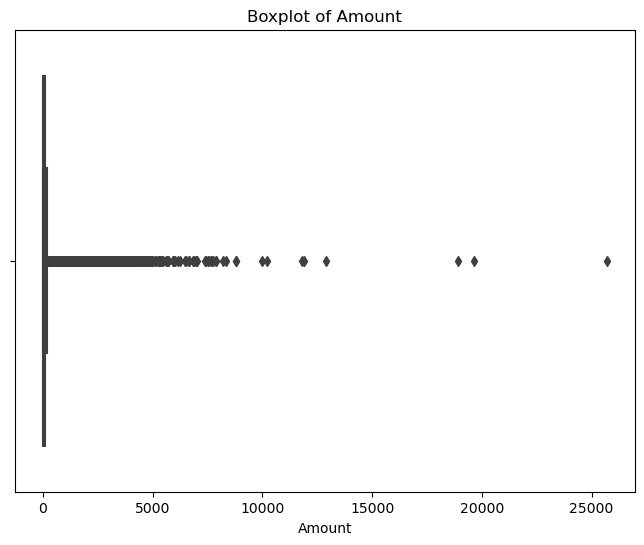

In [16]:
# Checking the outliers 
# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=creditcard_dataset['Amount'])
plt.xlabel('Amount')
plt.title('Boxplot of Amount')
plt.show()


In [17]:
## To make it more symmetrical and transforming the Amount column
## Logarithmic Transformation:
## Logarithmic transformation is often used for right-skewed data. You can take the natural logarithm of the Amount variable.
creditcard_dataset['Amount_log'] = np.log(creditcard_dataset['Amount'] + 1)  # Adding 1 to handle zero values if any
creditcard_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_log
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,5.014760
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1.305626
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,5.939276
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,4.824306
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4.262539


C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


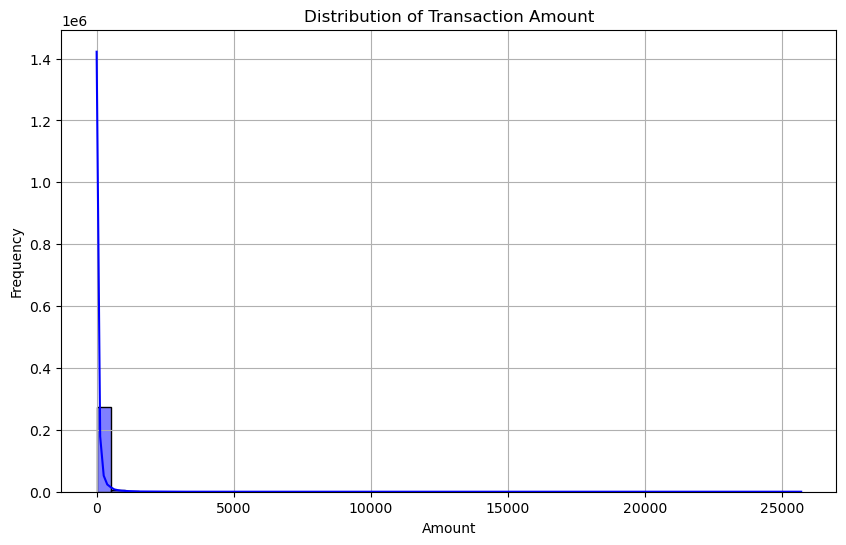

In [18]:
# Plot distribution of 'Amount' feature
plt.figure(figsize=(10, 6))
sns.histplot(creditcard_dataset['Amount'], bins=50, kde=True, color='blue')
plt.grid(True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


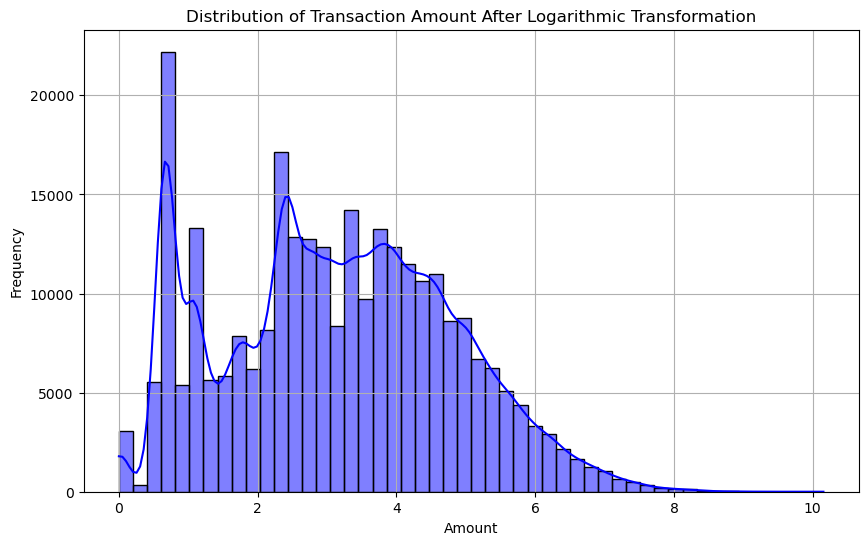

In [19]:
# visualization
plt.figure(figsize=(10, 6))
sns.histplot(creditcard_dataset['Amount_log'], bins=50, kde=True, color='blue')
plt.grid(True)
plt.title('Distribution of Transaction Amount After Logarithmic Transformation')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [20]:
# calculate the skewness
print("--"*30)
print("calculate the skewness")
print(creditcard_dataset.Amount.skew())
print("--"*30)
print(f"{creditcard_dataset.Amount.skew()} That's the strong right skew")

------------------------------------------------------------
calculate the skewness
16.978803370060476
------------------------------------------------------------
16.978803370060476 That's the strong right skew


In [21]:
# calculate the skewness after the logarithmetic transformation
print("--"*30)
print("calculate the skewness after Logarithmetic transformation")
print(creditcard_dataset.Amount_log.skew())
print("--"*30)
print("Logarithmetic removed most of the skewness")

------------------------------------------------------------
calculate the skewness after Logarithmetic transformation
0.16141018223366638
------------------------------------------------------------
Logarithmetic removed most of the skewness


In [22]:
# For Time 
print("--"*30)
print("Stats for the Time column\n")
print(creditcard_dataset.Time.describe())

------------------------------------------------------------
Stats for the Time column

count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64


In [23]:
# Converting Time from seconds to hours 
print("--"*30)
print("Converting Time from seconds to hours")
creditcard_dataset['Time_hrs'] = creditcard_dataset.Time / 3600
print(creditcard_dataset['Time_hrs'])

------------------------------------------------------------
Converting Time from seconds to hours
0          0.000000
1          0.000000
2          0.000278
3          0.000278
4          0.000556
            ...    
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_hrs, Length: 283726, dtype: float64


In [24]:
# After converting seconds into hours 
print("--"*30)
print(creditcard_dataset.Time_hrs.describe())
print("--"*30)

------------------------------------------------------------
count    283726.000000
mean         26.336410
std          13.189180
min           0.000000
25%          15.056875
50%          23.525694
75%          38.693889
max          47.997778
Name: Time_hrs, dtype: float64
------------------------------------------------------------


In [25]:
# Converting hours into days 
print("--"*30)
print("Converting hours into days")
print("First time of transactions")
print(creditcard_dataset.Time_hrs.min() / 24 , "days")

print("last time of transactions")
print(np.round(creditcard_dataset.Time_hrs.max() / 24) , "days")
print("--"*30)

------------------------------------------------------------
Converting hours into days
First time of transactions
0.0 days
last time of transactions
2.0 days
------------------------------------------------------------


C:\Users\Amit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


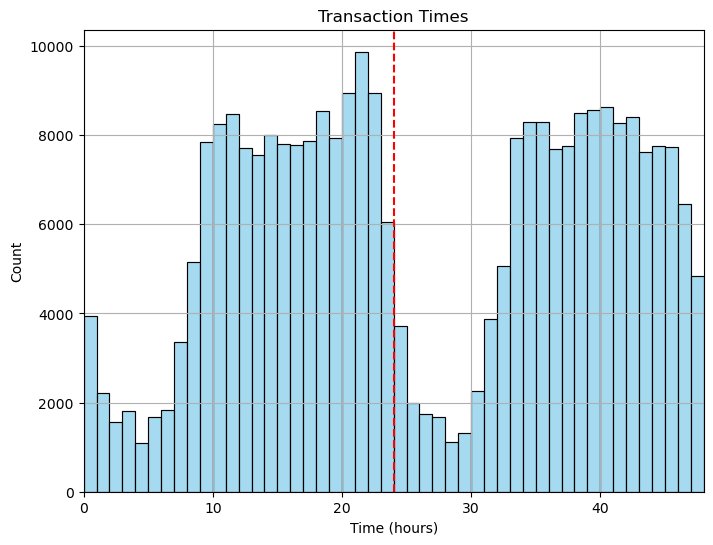

In [26]:
# visual
plt.figure(figsize=(8,6))
sns.histplot(creditcard_dataset.Time_hrs, bins=48, color="skyblue")
plt.grid(True)
plt.xlim([0, 48])
plt.title("Transaction Times")
plt.axvline(x=24, c="red", linestyle="--")
plt.xlabel("Time (hours)")
plt.ylabel("Count")
plt.show()

Between 8 to 21 hours most of the transactions occured(7000 - nearly 10000).<br/>
Between 32 to 47 hours most of the transactions occured(nealy 8000 - approx 8500)<br/>
Daytime Activity (8 to 21 hours): During typical daytime hours, ranging from 8 AM to 9 PM, the dataset exhibits a significant surge in transaction frequency. 
<br/>
Late-night Activity (32 to 47 hours): Interestingly, there is another notable peak in transaction frequency during the late-night hours, spanning from 8 PM to 11 PM and continuing into the early morning hours until 11 AM.

#### Feature selection

In [27]:
# features 
print("--"*30)
print("feature Selection")
print("columns name : ", creditcard_dataset.columns)

------------------------------------------------------------
feature Selection
columns name :  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_log', 'Time_hrs'],
      dtype='object')


In [28]:
# storing the required features into a variable called features
features = creditcard_dataset.drop(columns=['Time' , 'Class' , 'Amount'])
target = creditcard_dataset['Class']

In [29]:
# Shape of the features 
print("--"*30)
print("Shape of the feature is : ", features.shape)
print("Shape of the target is : " , target.shape)

------------------------------------------------------------
Shape of the feature is :  (283726, 30)
Shape of the target is :  (283726,)


#### Model (Machine learning models)

In [30]:
# Importing libraries from scikit learn
## Scaling
from sklearn.preprocessing import StandardScaler

## train and test
from sklearn.model_selection import train_test_split

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

#metrics 
from sklearn.metrics import classification_report , accuracy_score


In [31]:
# initializing the StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print("--"*30)
print("Shape of the scaled_feature is : ", scaled_features.shape)

------------------------------------------------------------
Shape of the scaled_feature is :  (283726, 30)


In [32]:
X_train , X_test , y_train , y_test = train_test_split(scaled_features , target , test_size=0.2 , random_state=42)
print("--"*30)
print("Training Dataset\n" , X_train.shape , y_train.shape)
print("\n")
print("Testing Dataset\n" , X_test.shape , y_test.shape)
print("--"*30)

------------------------------------------------------------
Training Dataset
 (226980, 30) (226980,)


Testing Dataset
 (56746, 30) (56746,)
------------------------------------------------------------


In [33]:
# Initialize classifiers
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
svm = SVC()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

In [34]:
# Train and evaluate each classifier
classifiers = [logistic_regression, decision_tree, random_forest, gradient_boosting, svm, knn, naive_bayes]
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"{clf.__class__.__name__} Accuracy: {accuracy}")
    print(f"{clf.__class__.__name__} Classification Report:\n{report}")

# Voting Classifier (Ensemble)
voting_clf = VotingClassifier(estimators=[('lr', logistic_regression), 
                                          ('dt', decision_tree), 
                                          ('rf', random_forest), 
                                          ('gb', gradient_boosting), 
                                          ('svm', svm), 
                                          ('knn', knn), 
                                          ('nb', naive_bayes)], voting='hard')
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
report_voting = classification_report(y_test, y_pred_voting)
print(f"Voting Classifier Accuracy: {accuracy_voting}")
print(f"Voting Classifier Classification Report:\n{report_voting}")

LogisticRegression Accuracy: 0.9991541254009093
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.53      0.67        90

    accuracy                           1.00     56746
   macro avg       0.94      0.77      0.83     56746
weighted avg       1.00      1.00      1.00     56746

DecisionTreeClassifier Accuracy: 0.999066013463504
DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.69      0.73      0.71        90

    accuracy                           1.00     56746
   macro avg       0.85      0.87      0.86     56746
weighted avg       1.00      1.00      1.00     56746

RandomForestClassifier Accuracy: 0.9995241955380115
RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

      

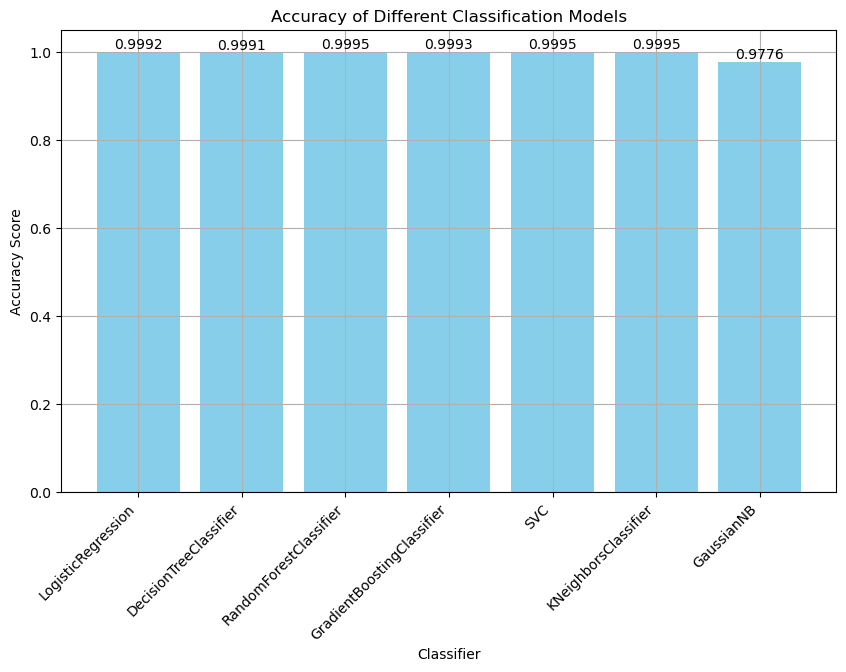

In [37]:
# List of classifiers and their accuracy scores
classifiers_names = [clf.__class__.__name__ for clf in classifiers]
accuracy_scores = [accuracy_score(y_test, clf.predict(X_test)) for clf in classifiers]

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(classifiers_names, accuracy_scores, color='skyblue')
# Adding labels to each bar
for i, score in enumerate(accuracy_scores):
    plt.text(i, score, f'{score:.4f}', ha='center', va='bottom')
plt.grid(True)
plt.xlabel('Classifier')
plt.ylabel('Accuracy Score')
plt.title('Accuracy of Different Classification Models')
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the classification reports and accuracy scores of various classification models, it's evident that most models perform exceptionally well on the task of credit card fraud detection. Here's a summary:

Logistic Regression achieved an accuracy of 99.92%, with a precision of 89% and recall of 53% for detecting fraudulent transactions.

Decision Tree Classifier attained an accuracy of 99.91%, with a precision of 69% and recall of 73%.

Random Forest Classifier exhibited an accuracy of 99.95%, with a precision of 97% and recall of 72%.

Gradient Boosting Classifier achieved an accuracy of 99.93%, with a precision of 90% and recall of 63%.

Support Vector Classifier (SVC) demonstrated an accuracy of 99.95%, with a precision of 98% and recall of 67%.

K Neighbors Classifier also achieved an accuracy of 99.95%, with a precision of 97% and recall of 72%.

Gaussian Naive Bayes, while still performing reasonably well, showed a lower accuracy of 97.76%, with a precision of 5% and recall of 79%.

The Voting Classifier, which combines the predictions of multiple classifiers, achieved the highest accuracy of 99.96%, with a precision of 97% and recall of 74%.

In conclusion, the ensemble method, Voting Classifier, emerges as the best-performing model for this task, with the highest accuracy and a balanced trade-off between precision and recall. However, it's important to note that the choice of the best model may also depend on other factors such as computational resources, interpretability, and specific requirements of the application.